### Student Information
Name: Ric Chen 陳育陞

Student ID: 110506025

GitHub ID: uilfl

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [192]:
### Begin Assignment Here
# reead the dataset

import pandas as pd 
import numpy as np 

df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [193]:
df.isnull().sum()

sentiment    0
comment      0
dtype: int64

In [69]:
df.head(20)

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w..."
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...
8,not nostalgia,Wherever you are you always in my heart
9,not nostalgia,Elvis will always be number one no one can com...


In [194]:
df.head()



,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [195]:
df.describe()

,sentiment,comment
count,1500,1500
unique,2,1499
top,not nostalgia,never heard this song before... WOW What an am...
freq,750,2


## Make words lower case and Remove Punctuation, Numbers, and Special Characters

In [196]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [198]:
df['sentiment']

0       not nostalgia
1           nostalgia
2           nostalgia
3       not nostalgia
4           nostalgia
            ...      
1495    not nostalgia
1496    not nostalgia
1497    not nostalgia
1498        nostalgia
1499        nostalgia
Name: sentiment, Length: 1500, dtype: object

In [75]:
nostalgia_comments = df[df['sentiment'] == 'nostalgia']
nostalgia_comments[:20]


,sentiment,comment
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w..."
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...
11,nostalgia,this song came out my senior year in high scho...
12,nostalgia,A few years back picked up at a charity shop a...
13,nostalgia,I am 47 and grew up on songs of this type. I ...
17,nostalgia,"It is a memory lane, I grew up listening to Ji..."


In [199]:
not_nostalgia_comments = df[df['sentiment'] == 'not nostalgia']
not_nostalgia_comments[:20]


,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
8,not nostalgia,Wherever you are you always in my heart
9,not nostalgia,Elvis will always be number one no one can com...
10,not nostalgia,ill bet if they begin to play this song on the...
14,not nostalgia,I remember my father used to listen to Jim Ree...
15,not nostalgia,This song/singer has very special meaning as i...
16,not nostalgia,Sir. Jim Reeves!! I love him. I'm 29 years old...
22,not nostalgia,"As for entertainment there was nothing, and th..."
23,not nostalgia,He is the best there was best there ever will ...


In [77]:
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


#### Check Duplicates

In [200]:
df.duplicated().sum()

1

In [201]:
# Drop one of the duplicate rows
df = df.drop_duplicates()

# Verify the changes
df.duplicated().sum()

0

##### Make the Upper Case to Lower cases

In [202]:
df['comment'] = df['comment'].str.lower()

import re
def remove_punct_numbers(text):
    # Remove punctuation and numbers using regular expressions
    text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation
    text = re.sub(r'\d+', '', text)      # Removes numbers
    return text

df['comment'] = df['comment'].apply(remove_punct_numbers)


/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/4119841249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'] = df['comment'].str.lower()
/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/4119841249.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'] = df['comment'].apply(remove_punct_numbers)


#### Tokenized words

In [203]:
import nltk
nltk.download('punkt')  # Download the tokenizer models if not already downloaded

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

df['comment_tokens'] = df['comment'].apply(tokenize_text)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chenyusheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/2070519434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_tokens'] = df['comment'].apply(tokenize_text)


#### Remove Stopwords

In [204]:
from nltk.corpus import stopwords
nltk.download('stopwords')  # Download the stopwords if not already downloaded

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

df['comment_tokens_nostop'] = df['comment_tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenyusheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/3622717231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_tokens_nostop'] = df['comment_tokens'].apply(remove_stopwords)


In [205]:
df['comment_tokens_nostop']

0       [singer, golden, voice, love, hear, time, grea...
1       [mist, beautiful, voice, ever, listened, kid, ...
2       [mr, reeves, songs, always, love, smooth, voic...
3       [day, leave, st, tour, viet, nam, convince, ma...
4       [listening, songs, reminds, mum, played, every...
                              ...                        
1495    [dont, knowbut, opening, videoseeing, himwould...
1496    [sad, beautiful, song, love, someone, afraid, ...
1497    [dear, friend, think, age, time, important, co...
1498    [born, started, aware, popular, music, grandmo...
1499    [first, cd, bought, marriage, ended, divorce, ...
Name: comment_tokens_nostop, Length: 1499, dtype: object

In [85]:
df

,sentiment,comment,comment_tokens,comment_tokens_nostop
0,not nostalgia,he was a singer with a golden voice that i lov...,"[he, was, a, singer, with, a, golden, voice, t...","[singer, golden, voice, love, hear, time, grea..."
1,nostalgia,the mist beautiful voice ever i listened to hi...,"[the, mist, beautiful, voice, ever, i, listene...","[mist, beautiful, voice, ever, listened, kid, ..."
2,nostalgia,i have most of mr reeves songs always love hi...,"[i, have, most, of, mr, reeves, songs, always,...","[mr, reeves, songs, always, love, smooth, voic..."
3,not nostalgia,day leave from st tour in viet nam to convinc...,"[day, leave, from, st, tour, in, viet, nam, to...","[day, leave, st, tour, viet, nam, convince, ma..."
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","[listening, songs, reminds, mum, played, every..."
...,...,...,...,...
1495,not nostalgia,i dont knowbut the opening of the videoseeing ...,"[i, dont, knowbut, the, opening, of, the, vide...","[dont, knowbut, opening, videoseeing, himwould..."
1496,not nostalgia,its sad this is such a beautiful song when you...,"[its, sad, this, is, such, a, beautiful, song,...","[sad, beautiful, song, love, someone, afraid, ..."
1497,not nostalgia,dear friend i think age and time is not that i...,"[dear, friend, i, think, age, and, time, is, n...","[dear, friend, think, age, time, important, co..."
1498,nostalgia,i was born in and started to be aware of popu...,"[i, was, born, in, and, started, to, be, aware...","[born, started, aware, popular, music, grandmo..."


### Stemming and Lemmatization : both reduce words to their root form by removing suffixes.


In [206]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens):
    stemmed = [stemmer.stem(word) for word in tokens]
    return stemmed

df['comment_stemmed'] = df['comment_tokens_nostop'].apply(stem_tokens)


/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/2457121942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_stemmed'] = df['comment_tokens_nostop'].apply(stem_tokens)


In [88]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')  # Download WordNet corpus
nltk.download('omw-1.4')  # Download additional WordNet data

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized

df['comment_lemmatized'] = df['comment_tokens_nostop'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenyusheng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/chenyusheng/nltk_data...
/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/3404184579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_lemmatized'] = df['comment_tokens_nostop'].apply(lemmatize_tokens)


In [207]:
df['comment_processed'] = df['comment_lemmatized'].apply(lambda x: ' '.join(x))

KeyError: 'comment_lemmatized'

In [102]:
# View the original and processed comments side by side
df[['comment', 'comment_processed']].head()
df['comment_processed_str'] = df['comment_processed'].apply(lambda x: ' '.join(x))
df.drop(columns=['comment_processed_str'], inplace=True)
df


/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/1848167519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_processed_str'] = df['comment_processed'].apply(lambda x: ' '.join(x))
/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/1848167519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['comment_processed_str'], inplace=True)


,sentiment,comment,comment_tokens,comment_tokens_nostop,comment_stemmed,comment_lemmatized,comment_processed
0,not nostalgia,he was a singer with a golden voice that i lov...,"[he, was, a, singer, with, a, golden, voice, t...","[singer, golden, voice, love, hear, time, grea...","[singer, golden, voic, love, hear, time, great...","[singer, golden, voice, love, hear, time, grea...",singer golden voice love hear time great fan a...
1,nostalgia,the mist beautiful voice ever i listened to hi...,"[the, mist, beautiful, voice, ever, i, listene...","[mist, beautiful, voice, ever, listened, kid, ...","[mist, beauti, voic, ever, listen, kid, still,...","[mist, beautiful, voice, ever, listened, kid, ...",mist beautiful voice ever listened kid still l...
2,nostalgia,i have most of mr reeves songs always love hi...,"[i, have, most, of, mr, reeves, songs, always,...","[mr, reeves, songs, always, love, smooth, voic...","[mr, reev, song, alway, love, smooth, voic, co...","[mr, reef, song, always, love, smooth, voice, ...",mr reef song always love smooth voice comforti...
3,not nostalgia,day leave from st tour in viet nam to convinc...,"[day, leave, from, st, tour, in, viet, nam, to...","[day, leave, st, tour, viet, nam, convince, ma...","[day, leav, st, tour, viet, nam, convinc, mari...","[day, leave, st, tour, viet, nam, convince, ma...",day leave st tour viet nam convince mary lou m...
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","[listening, songs, reminds, mum, played, every...","[listen, song, remind, mum, play, everyday]","[listening, song, reminds, mum, played, everyday]",listening song reminds mum played everyday
...,...,...,...,...,...,...,...
1495,not nostalgia,i dont knowbut the opening of the videoseeing ...,"[i, dont, knowbut, the, opening, of, the, vide...","[dont, knowbut, opening, videoseeing, himwould...","[dont, knowbut, open, videose, himwould, sugge...","[dont, knowbut, opening, videoseeing, himwould...",dont knowbut opening videoseeing himwould sugg...
1496,not nostalgia,its sad this is such a beautiful song when you...,"[its, sad, this, is, such, a, beautiful, song,...","[sad, beautiful, song, love, someone, afraid, ...","[sad, beauti, song, love, someon, afraid, tell...","[sad, beautiful, song, love, someone, afraid, ...",sad beautiful song love someone afraid tell re...
1497,not nostalgia,dear friend i think age and time is not that i...,"[dear, friend, i, think, age, and, time, is, n...","[dear, friend, think, age, time, important, co...","[dear, friend, think, age, time, import, come,...","[dear, friend, think, age, time, important, co...",dear friend think age time important come musi...
1498,nostalgia,i was born in and started to be aware of popu...,"[i, was, born, in, and, started, to, be, aware...","[born, started, aware, popular, music, grandmo...","[born, start, awar, popular, music, grandmoth,...","[born, started, aware, popular, music, grandmo...",born started aware popular music grandmother s...


### Visualization for two sentiments(sentiments considered as categories)


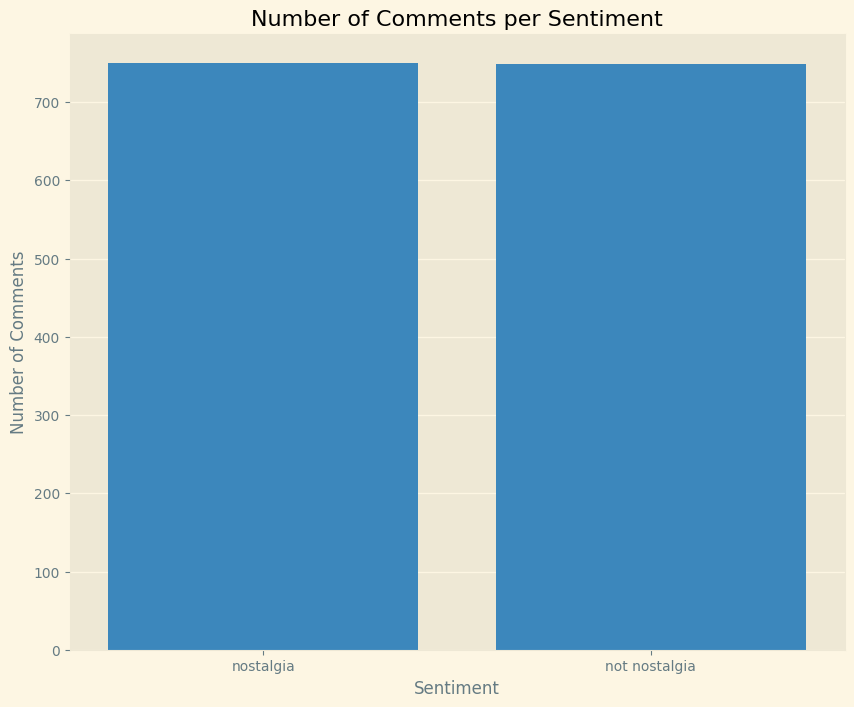

In [126]:
import seaborn as sns 
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(10, 8))
g = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Sentiment')
plt.show()


## Data Sampling


In [24]:
df_sample = df.sample(n=200) #random state

In [ ]:
len(df_sample)

In [ ]:
df_sample[:10]

In [ ]:
print(df_sample.describe())



In [ ]:
print(df_sample.apply(lambda col: len(col.unique())))

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sentiments = df['sentiment'].unique()
print(sentiments)

In [ ]:
plt.style.use('Solarize_Light2')

# plot barchart for X
df.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

## Data Prprocessing


In [107]:
df[0:4]["comment_processed"]

0    singer golden voice love hear time great fan a...
1    mist beautiful voice ever listened kid still l...
2    mr reef song always love smooth voice comforti...
3    day leave st tour viet nam convince mary lou m...
Name: comment_processed, dtype: object

In [108]:
df[0:4]

,sentiment,comment,comment_tokens,comment_tokens_nostop,comment_stemmed,comment_lemmatized,comment_processed
0,not nostalgia,he was a singer with a golden voice that i lov...,"[he, was, a, singer, with, a, golden, voice, t...","[singer, golden, voice, love, hear, time, grea...","[singer, golden, voic, love, hear, time, great...","[singer, golden, voice, love, hear, time, grea...",singer golden voice love hear time great fan a...
1,nostalgia,the mist beautiful voice ever i listened to hi...,"[the, mist, beautiful, voice, ever, i, listene...","[mist, beautiful, voice, ever, listened, kid, ...","[mist, beauti, voic, ever, listen, kid, still,...","[mist, beautiful, voice, ever, listened, kid, ...",mist beautiful voice ever listened kid still l...
2,nostalgia,i have most of mr reeves songs always love hi...,"[i, have, most, of, mr, reeves, songs, always,...","[mr, reeves, songs, always, love, smooth, voic...","[mr, reev, song, alway, love, smooth, voic, co...","[mr, reef, song, always, love, smooth, voice, ...",mr reef song always love smooth voice comforti...
3,not nostalgia,day leave from st tour in viet nam to convinc...,"[day, leave, from, st, tour, in, viet, nam, to...","[day, leave, st, tour, viet, nam, convince, ma...","[day, leav, st, tour, viet, nam, convinc, mari...","[day, leave, st, tour, viet, nam, convince, ma...",day leave st tour viet nam convince mary lou m...


In [109]:
list(df[0:1]['comment_processed'])

['singer golden voice love hear time great fan age year day still although many singer vouch jim reef time feel relaxed emotional loving thank lord life']

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment_processed) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 24 stored elements and shape (1, 3472)>
  Coords	Values
  (0, 2733)	2
  (0, 1253)	1
  (0, 3280)	1
  (0, 1791)	1
  (0, 1387)	1
  (0, 3085)	2
  (0, 1299)	1
  (0, 1051)	1
  (0, 46)	1
  (0, 3442)	1
  (0, 717)	1
  (0, 2892)	1
  (0, 81)	1
  (0, 1846)	1
  (0, 3287)	1
  (0, 1608)	1
  (0, 2429)	1
  (0, 1070)	1
  (0, 2447)	1
  (0, 930)	1
  (0, 1800)	1
  (0, 3036)	1
  (0, 1781)	1
  (0, 1728)	1


In [111]:
count_vect.get_feature_names_out()[3000]

'tassie'

In [112]:
count_vect.get_feature_names_out()[200:210]

array(['backyard', 'bad', 'badly', 'bag', 'ball', 'ballad', 'ballroom',
       'band', 'bandelvis', 'banger'], dtype=object)

In [113]:
df_counts.shape

(1499, 3472)

In [114]:
count_vect.get_feature_names_out()[0:10]

array(['abandant', 'ability', 'able', 'abroad', 'absolutely', 'absorbed',
       'accent', 'accepting', 'accident', 'accurate'], dtype=object)

In [115]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [116]:
count_vect.get_feature_names_out()[100:110]

array(['anna', 'anniversary', 'announcement', 'annoying', 'another',
       'answer', 'anthony', 'antiestablishment', 'anybody', 'anymore'],
      dtype=object)

In [117]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [ ]:
term_frequencies

In [118]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/1982577836.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


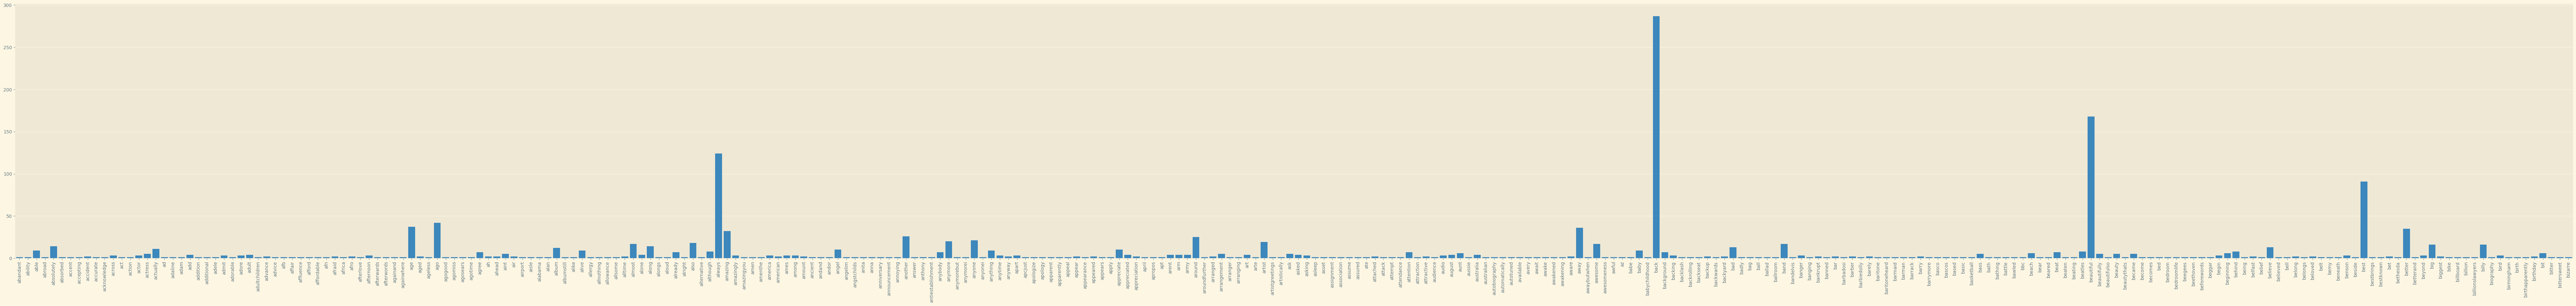

In [119]:
import seaborn as sns 
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [ ]:
df

/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/481361288.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([count_vect.get_feature_names_out()[i] for i in top_n_words], rotation=45)


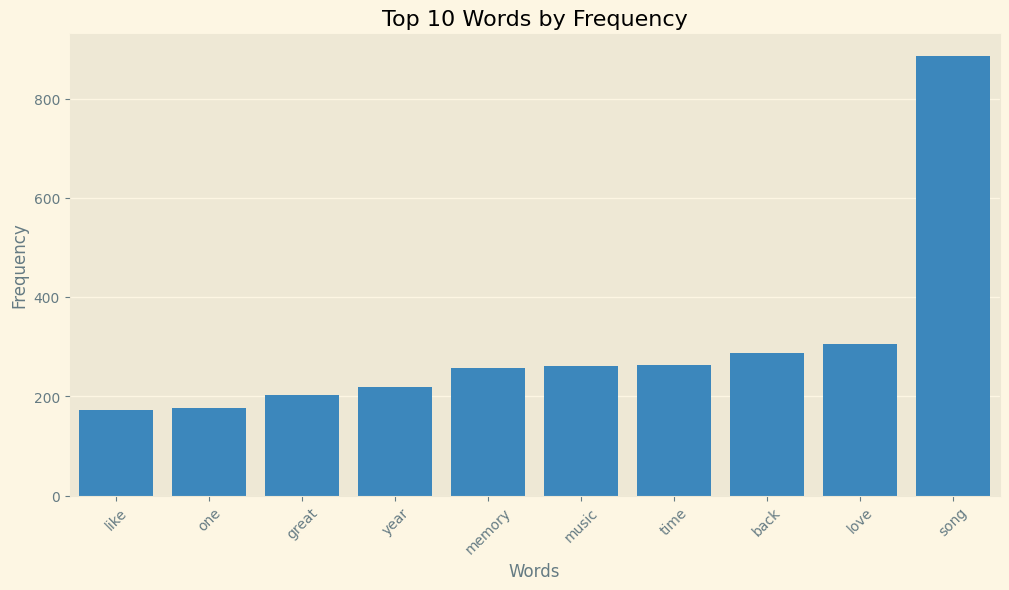

In [127]:
top_n = 10
top_n_words = np.argsort(term_frequencies)[-top_n:]

# Plot the top 10 words
plt.subplots(figsize=(12, 6))
g = sns.barplot(x=[count_vect.get_feature_names_out()[i] for i in top_n_words], 
                y=term_frequencies[top_n_words])
g.set_xticklabels([count_vect.get_feature_names_out()[i] for i in top_n_words], rotation=45)
g.set_title('Top 10 Words by Frequency')
g.set_ylabel('Frequency')
g.set_xlabel('Words')
plt.show()

/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/1522581701.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  t.set_xticklabels([count_vect.get_feature_names_out()[i] for i in sorted_indices], rotation=90)


[Text(0, 0, 'song'),
 Text(1, 0, 'love'),
 Text(2, 0, 'back'),
 Text(3, 0, 'time'),
 Text(4, 0, 'music'),
 Text(5, 0, 'memory'),
 Text(6, 0, 'year'),
 Text(7, 0, 'great'),
 Text(8, 0, 'one'),
 Text(9, 0, 'like'),
 Text(10, 0, 'beautiful'),
 Text(11, 0, 'day'),
 Text(12, 0, 'old'),
 Text(13, 0, 'voice'),
 Text(14, 0, 'good'),
 Text(15, 0, 'remember'),
 Text(16, 0, 'always'),
 Text(17, 0, 'still'),
 Text(18, 0, 'much'),
 Text(19, 0, 'brings'),
 Text(20, 0, 'never'),
 Text(21, 0, 'many'),
 Text(22, 0, 'best'),
 Text(23, 0, 'listening'),
 Text(24, 0, 'make'),
 Text(25, 0, 'first'),
 Text(26, 0, 'really'),
 Text(27, 0, 'listen'),
 Text(28, 0, 'thank'),
 Text(29, 0, 'miss'),
 Text(30, 0, 'hear'),
 Text(31, 0, 'heard'),
 Text(32, 0, 'ever'),
 Text(33, 0, 'childhood'),
 Text(34, 0, 'know'),
 Text(35, 0, 'im'),
 Text(36, 0, 'reminds'),
 Text(37, 0, 'singer'),
 Text(38, 0, 'loved'),
 Text(39, 0, 'would'),
 Text(40, 0, 'sing'),
 Text(41, 0, 'life'),
 Text(42, 0, 'every'),
 Text(43, 0, 'dad'),
 Te

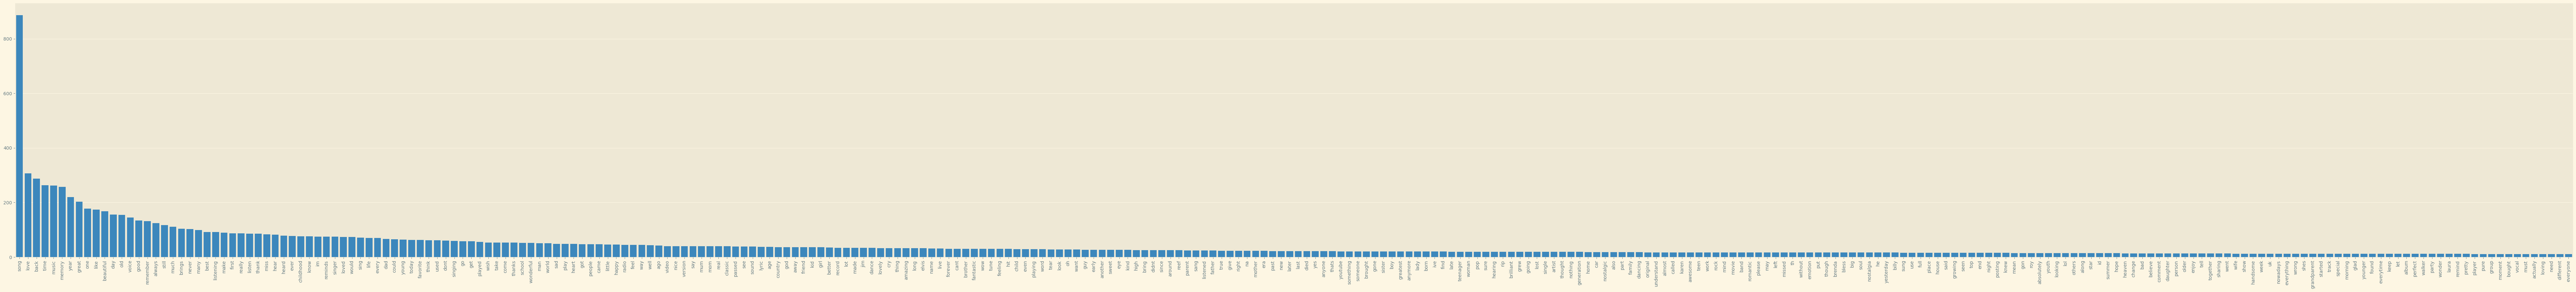

In [128]:
sorted_indices = np.argsort(term_frequencies)[-300:][::-1]
plt.subplots(figsize=(100, 10))
t = sns.barplot(x=[count_vect.get_feature_names_out()[i] for i in sorted_indices],
                y=term_frequencies[sorted_indices])
t.set_xticklabels([count_vect.get_feature_names_out()[i] for i in sorted_indices], rotation=90)

### Word Cloud for each sentiment 

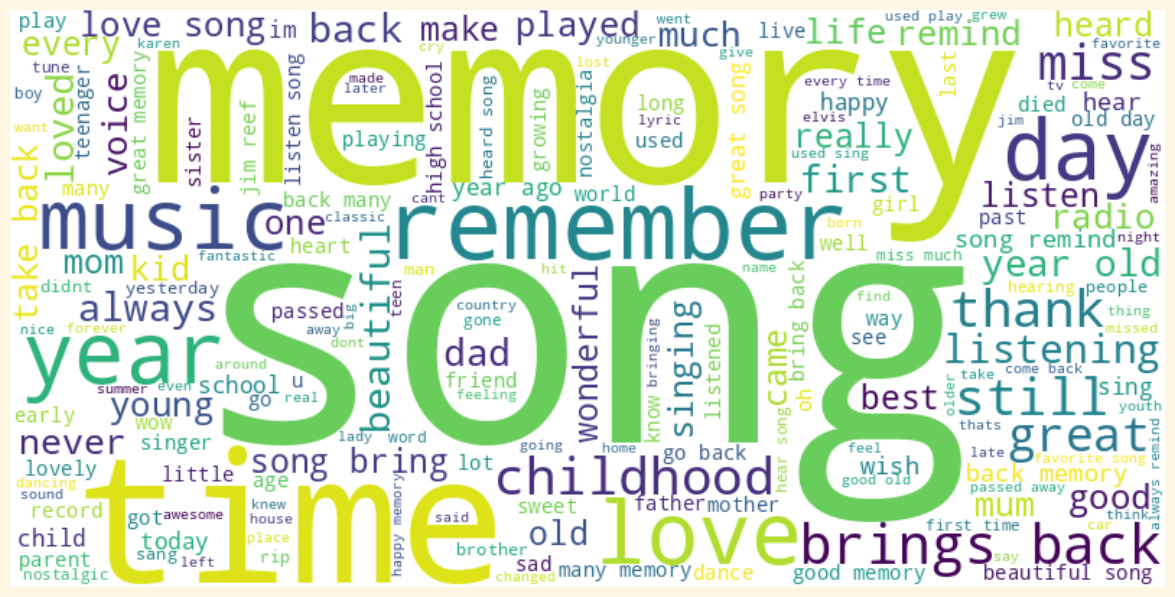

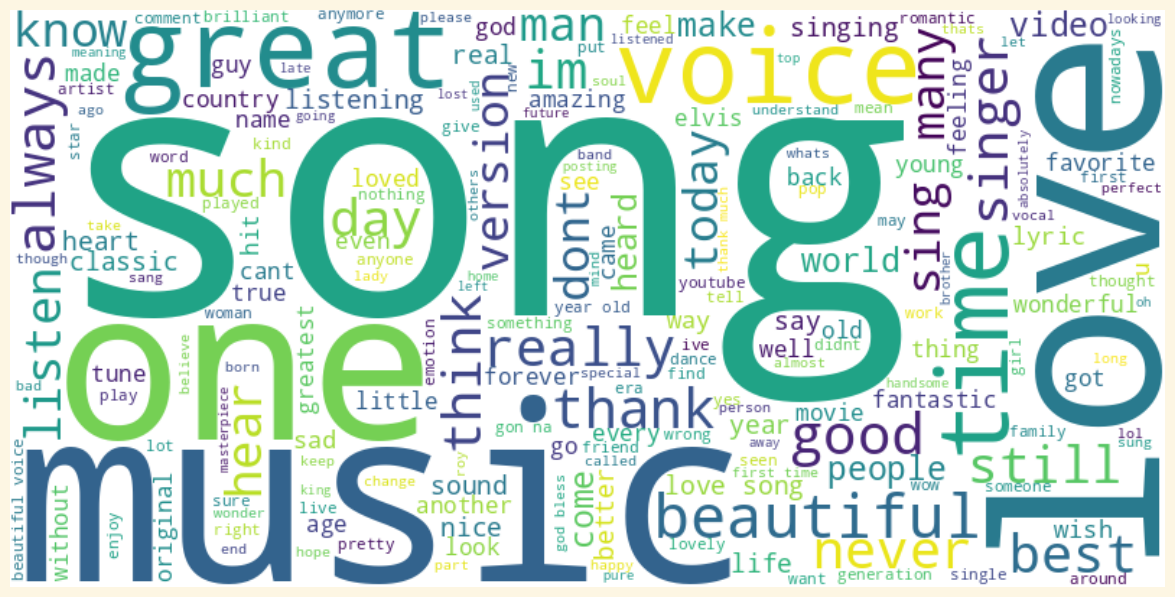

In [131]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud for 'nostalgia' comments
nostalgia_text = ' '.join(df[df['sentiment'] == 'nostalgia']['comment_processed'])
generate_wordcloud(nostalgia_text)

# Generate word cloud for 'not nostalgia' comments
not_nostalgia_text = ' '.join(df[df['sentiment'] == 'not nostalgia']['comment_processed'])
generate_wordcloud(not_nostalgia_text)


In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['comment_processed'])
X_tfidf.shape
print(X_tfidf[0])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 24 stored elements and shape (1, 3472)>
  Coords	Values
  (0, 2733)	0.31843068932931134
  (0, 1253)	0.23088605859169464
  (0, 3280)	0.13360098367501985
  (0, 1791)	0.10758708061611731
  (0, 1387)	0.15247795068426495
  (0, 3085)	0.22685688376369778
  (0, 1299)	0.12311288580362936
  (0, 1051)	0.23871860626319424
  (0, 46)	0.18570853965175224
  (0, 3442)	0.11967930220979321
  (0, 717)	0.130499350380358
  (0, 2892)	0.14245770117037998
  (0, 81)	0.23871860626319424
  (0, 1846)	0.14632540201720967
  (0, 3287)	0.2974255235076066
  (0, 1608)	0.18800519298413393
  (0, 2429)	0.20043502995862778
  (0, 1070)	0.18148476368662464
  (0, 2447)	0.2703707095368975
  (0, 930)	0.26166100481777516
  (0, 1800)	0.22748984392933685
  (0, 3036)	0.15344174893493895
  (0, 1781)	0.2545446579000459
  (0, 1728)	0.16095037901342488


In [210]:
sentiments = df['sentiment'].unique()
sentiments

array(['not nostalgia', 'nostalgia'], dtype=object)

# PAMI


In [152]:
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each sentiment
sentiments = df['sentiment'].unique()  # Get unique sentiment labels
sentiments_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiments_dfs[sentiment] = df[df['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment_processed'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    term_document_dfs[sentiment] = create_term_document_df(sentiments_dfs[sentiment])

In [155]:
sentiment_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,able,absolutely,absorbed,accident,acknowledge,across,actually,admit,adore,adult,...,younger,youngster,youngwe,youre,youth,youthful,youthmemories,youtube,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
sentiment_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,abandant,ability,able,abroad,absolutely,accent,accepting,accident,accurate,across,...,younger,youngest,youngster,youre,youth,youtube,yr,yuo,zealand,zulusbarbados
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


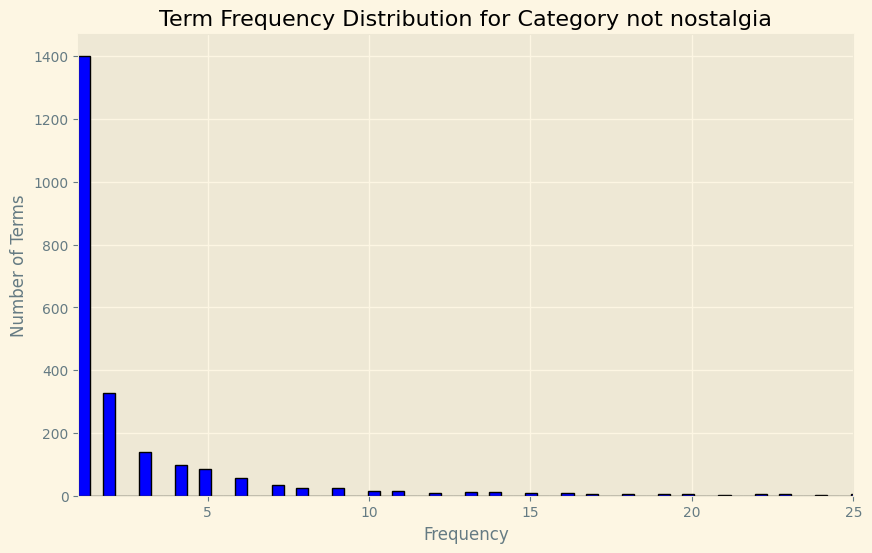

In [164]:
 # Sum over all documents to get total frequency for each word
category_number=1
 #You can change it from 0 to 3
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=1000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 25)
plt.show()

In [166]:
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    category_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 750
Number of items : 2065
Minimum Transaction Size : 2
Average Transaction Size : 12.301333333333334
Maximum Transaction Size : 41
Standard Deviation Transaction Size : 7.620839732091354
Variance in Transaction Sizes : 58.15473787271918
Sparsity : 0.9940429378531074


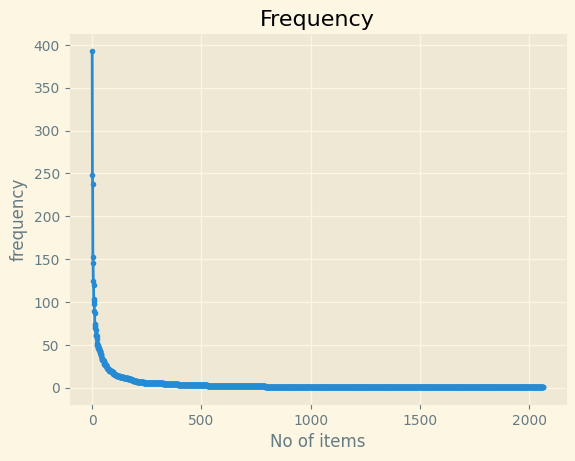

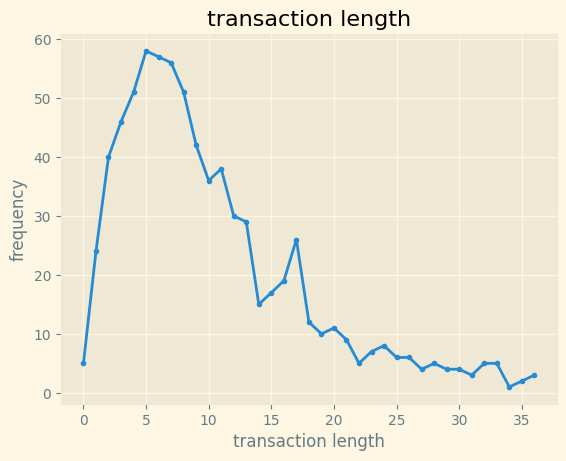

In [168]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 749
Number of items : 2356
Minimum Transaction Size : 3
Average Transaction Size : 11.304405874499333
Maximum Transaction Size : 50
Standard Deviation Transaction Size : 6.407459298377636
Variance in Transaction Sizes : 41.11042173878897
Sparsity : 0.9952018650787354


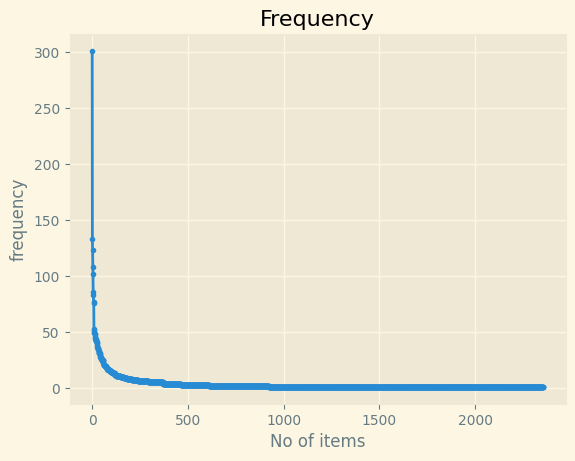

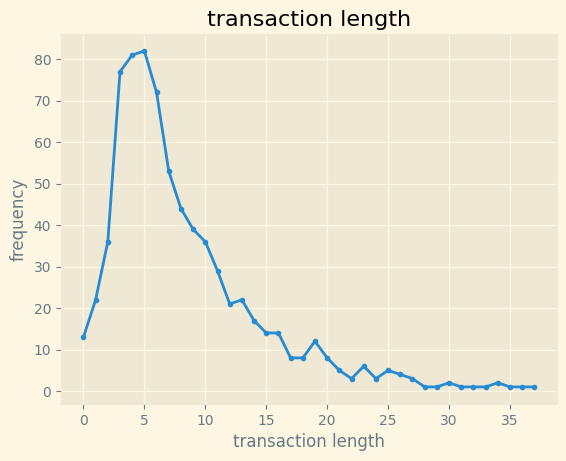

In [169]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [179]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 887
Runtime: 0.02083611488342285


In [182]:
obj1.save('freq_patterns_nostalgia.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,player,9
2,left,9
3,amazing,9
4,lady,9
...,...,...
882,memory back song,66
883,memory song,125
884,back,248
885,back song,124


In [184]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 343
Runtime: 0.01371908187866211


In [185]:
obj2.save('freq_patterns_not_nostalgia.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,special,9
1,rock,9
2,soul,9
3,mind,9
4,part,9
...,...,...
338,music love song,12
339,music song,33
340,love,133
341,love song,73


In [186]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for dataframe in dfs:
    for pattern in dataframe['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(dataframe) for dataframe in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for dataframe in dfs:
    filtered_df = dataframe[dataframe['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

               Patterns  Support
693              memory      238
696         memory song      125
697           back song      124
652            remember      120
694         memory back      117
..                  ...      ...
429    always love back        9
1                  left        9
425  always memory song        9
421        always music        9
426  always memory love        9

[852 rows x 2 columns]
Number of patterns discarded: 378


In [191]:
df

,Patterns,Support
0,special,9
1,rock,9
2,soul,9
3,mind,9
4,part,9
...,...,...
338,music love song,12
339,music song,33
340,love,133
341,love song,73


In [216]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'commend' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])  # X['commend'] contains your commend data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/2462556128.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_comment'] = df['comment'].str.split().apply(set)


,abandant,ability,able,about,above,abroad,absolutely,absorbed,accent,accepting,...,still love year,still day,always year,still old,still miss,always love back,left,always memory song,always music,always memory love
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Dimensional Reduction

In [217]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

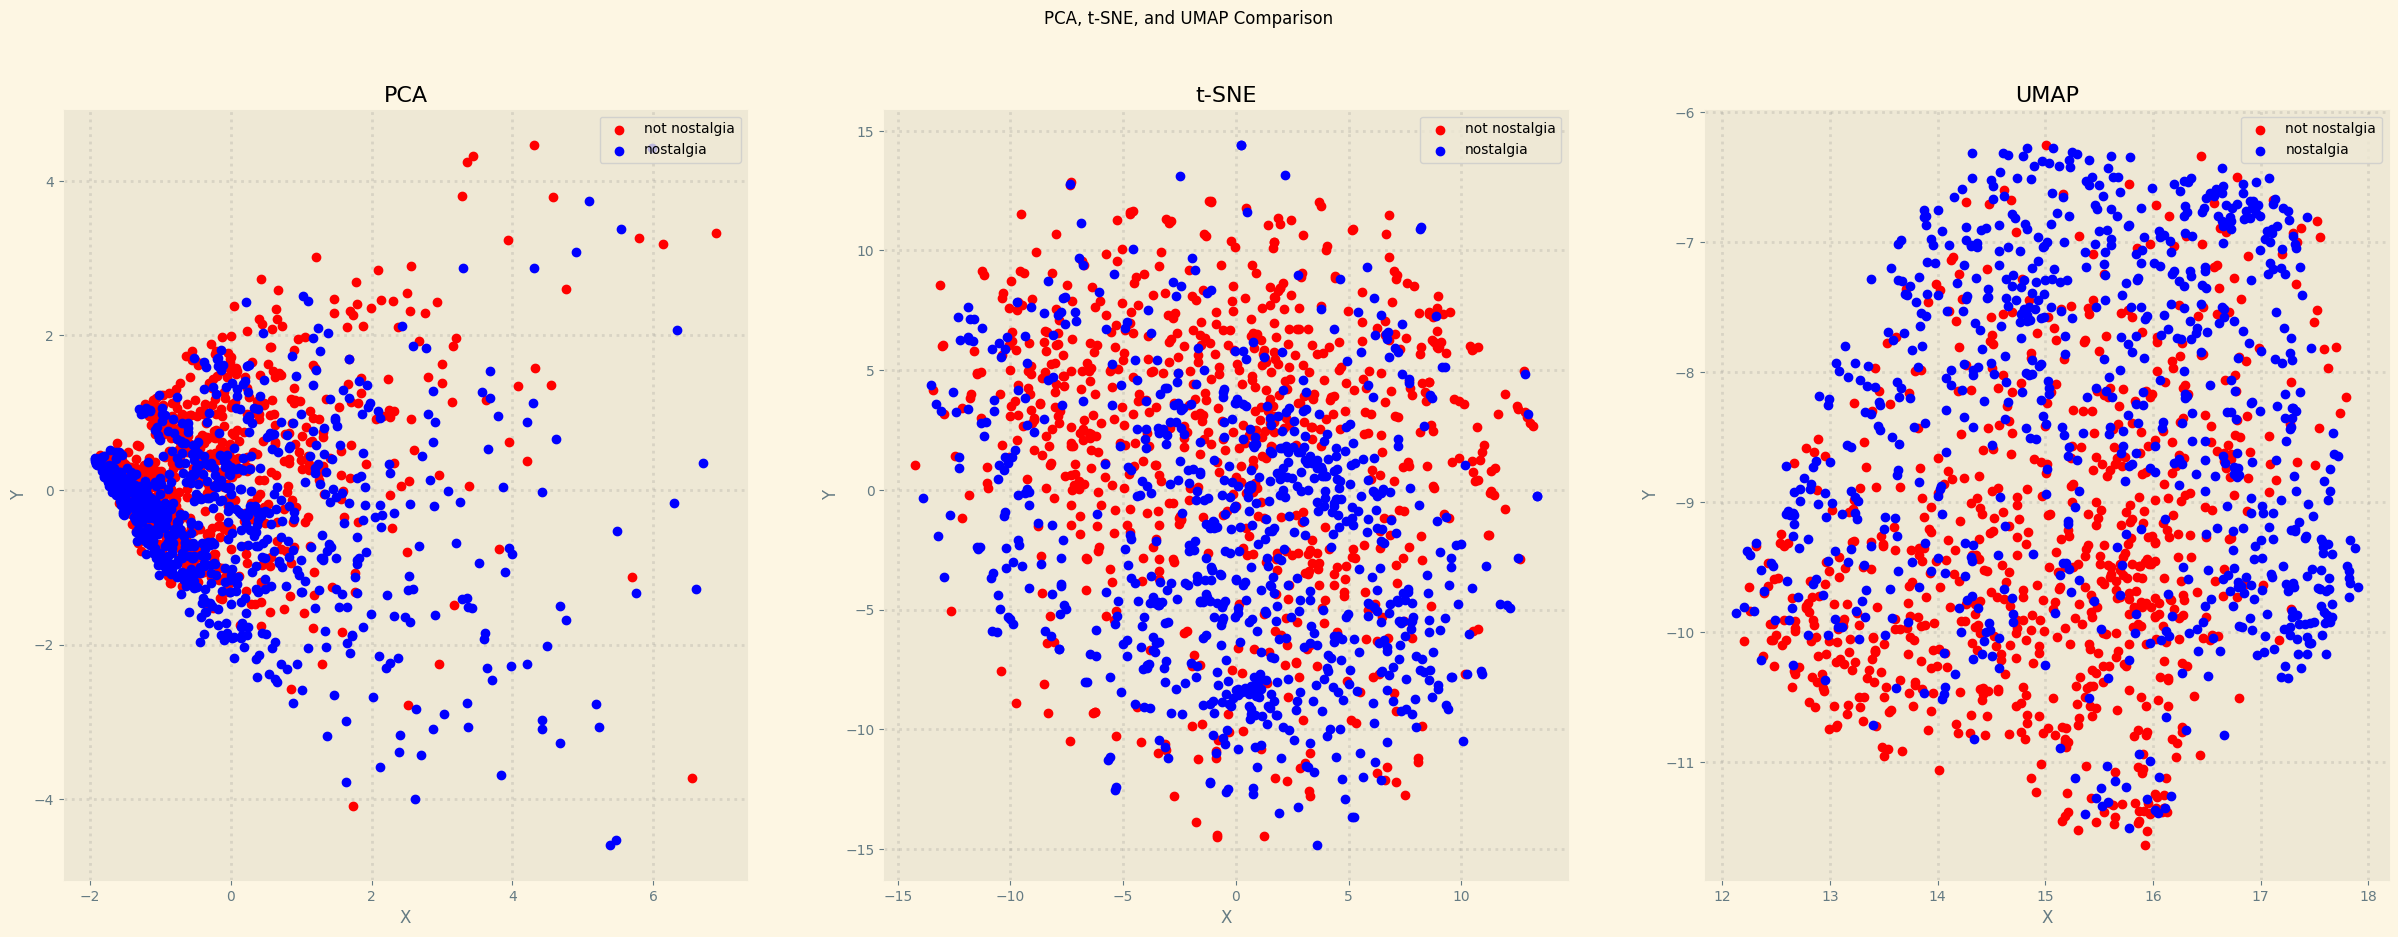

In [224]:
# Plot the results in subplots
col = ['red', 'blue', 'green', 'purple']
sentiment_category = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, sentiment_category):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

## Data Classification 

In [226]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)
df['bin_category'] = mlb.transform(df['sentiment']).tolist()
df[0:9]

/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/3923252025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin_category'] = mlb.transform(df['sentiment']).tolist()


,sentiment,comment,comment_tokens,comment_tokens_nostop,comment_stemmed,tokenized_comment,bin_category
0,not nostalgia,he was a singer with a golden voice that i lov...,"[he, was, a, singer, with, a, golden, voice, t...","[singer, golden, voice, love, hear, time, grea...","[singer, golden, voic, love, hear, time, great...","{emotional, love, of, for, relaxed, at, many, ...",[1]
1,nostalgia,the mist beautiful voice ever i listened to hi...,"[the, mist, beautiful, voice, ever, i, listene...","[mist, beautiful, voice, ever, listened, kid, ...","[mist, beauti, voic, ever, listen, kid, still,...","{never, love, listened, when, of, a, was, and,...",[0]
2,nostalgia,i have most of mr reeves songs always love hi...,"[i, have, most, of, mr, reeves, songs, always,...","[mr, reeves, songs, always, love, smooth, voic...","[mr, reev, song, alway, love, smooth, voic, co...","{my, smooth, never, grow, no, love, around, so...",[0]
3,not nostalgia,day leave from st tour in viet nam to convinc...,"[day, leave, from, st, tour, in, viet, nam, to...","[day, leave, st, tour, viet, nam, convince, ma...","[day, leav, st, tour, viet, nam, convinc, mari...","{hope, my, marry, me, nam, viet, receive, late...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","[listening, songs, reminds, mum, played, every...","[listen, song, remind, mum, play, everyday]","{everyday, reminds, me, my, to, who, him, his,...",[0]
5,nostalgia,every time i heard this song as a child i used...,"[every, time, i, heard, this, song, as, a, chi...","[every, time, heard, song, child, used, crybec...","[everi, time, heard, song, child, use, crybeca...","{me, death, jim, appreciate, fear, of, many, a...",[0]
6,nostalgia,my dad loved listening to jim reeves when i wa...,"[my, dad, loved, listening, to, jim, reeves, w...","[dad, loved, listening, jim, reeves, teenager,...","[dad, love, listen, jim, reev, teenag, back, d...","{my, me, for, a, was, do, the, back, i, but, i...",[0]
7,nostalgia,i have also listened to jim reeves since child...,"[i, have, also, listened, to, jim, reeves, sin...","[also, listened, jim, reeves, since, childhood...","[also, listen, jim, reev, sinc, childhood, nos...","{me, love, listened, music, comes, puts, he, a...",[0]
8,not nostalgia,wherever you are you always in my heart,"[wherever, you, are, you, always, in, my, heart]","[wherever, always, heart]","[wherev, alway, heart]","{my, heart, are, in, always, wherever, you}",[1]


In [228]:
df['sentiment_category'] = df['bin_category'].apply(lambda x: x[0])
df

/var/folders/dy/b4kk23k14lqd2n_97wj6bzv80000gn/T/ipykernel_10460/3936914411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df['bin_category'].apply(lambda x: x[0])


,sentiment,comment,comment_tokens,comment_tokens_nostop,comment_stemmed,tokenized_comment,bin_category,sentiment_category
0,not nostalgia,he was a singer with a golden voice that i lov...,"[he, was, a, singer, with, a, golden, voice, t...","[singer, golden, voice, love, hear, time, grea...","[singer, golden, voic, love, hear, time, great...","{emotional, love, of, for, relaxed, at, many, ...",[1],1
1,nostalgia,the mist beautiful voice ever i listened to hi...,"[the, mist, beautiful, voice, ever, i, listene...","[mist, beautiful, voice, ever, listened, kid, ...","[mist, beauti, voic, ever, listen, kid, still,...","{never, love, listened, when, of, a, was, and,...",[0],0
2,nostalgia,i have most of mr reeves songs always love hi...,"[i, have, most, of, mr, reeves, songs, always,...","[mr, reeves, songs, always, love, smooth, voic...","[mr, reev, song, alway, love, smooth, voic, co...","{my, smooth, never, grow, no, love, around, so...",[0],0
3,not nostalgia,day leave from st tour in viet nam to convinc...,"[day, leave, from, st, tour, in, viet, nam, to...","[day, leave, st, tour, viet, nam, convince, ma...","[day, leav, st, tour, viet, nam, convinc, mari...","{hope, my, marry, me, nam, viet, receive, late...",[1],1
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","[listening, songs, reminds, mum, played, every...","[listen, song, remind, mum, play, everyday]","{everyday, reminds, me, my, to, who, him, his,...",[0],0
...,...,...,...,...,...,...,...,...
1495,not nostalgia,i dont knowbut the opening of the videoseeing ...,"[i, dont, knowbut, the, opening, of, the, vide...","[dont, knowbut, opening, videoseeing, himwould...","[dont, knowbut, open, videose, himwould, sugge...","{painter, knowbut, thathes, videoseeing, of, w...",[1],1
1496,not nostalgia,its sad this is such a beautiful song when you...,"[its, sad, this, is, such, a, beautiful, song,...","[sad, beautiful, song, love, someone, afraid, ...","[sad, beauti, song, love, someon, afraid, tell...","{love, sad, someone, such, a, song, and, feel,...",[1],1
1497,not nostalgia,dear friend i think age and time is not that i...,"[dear, friend, i, think, age, and, time, is, n...","[dear, friend, think, age, time, important, co...","[dear, friend, think, age, time, import, come,...","{dear, music, comes, like, song, and, that, fr...",[1],1
1498,nostalgia,i was born in and started to be aware of popu...,"[i, was, born, in, and, started, to, be, aware...","[born, started, aware, popular, music, grandmo...","[born, start, awar, popular, music, grandmoth,...","{my, never, love, captured, emulate, even, gif...",[0],0


In [240]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiment_category','sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment_category'], test_size=0.3, random_state=42)

In [237]:
X_train.shape, X_test.shape

((1049, 3899), (450, 3899))

In [241]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8733333333333333

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8259    0.9571    0.8867       233
not nostalgia     0.9444    0.7834    0.8564       217

     accuracy                         0.8733       450
    macro avg     0.8852    0.8702    0.8716       450
 weighted avg     0.8831    0.8733    0.8721       450



In [245]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiment_category','sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment_category'], test_size=0.3, random_state=42)

In [246]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8933333333333333

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8745    0.9270    0.9000       233
not nostalgia     0.9163    0.8571    0.8857       217

     accuracy                         0.8933       450
    macro avg     0.8954    0.8921    0.8929       450
 weighted avg     0.8946    0.8933    0.8931       450



Accuracy: 0.8933333333333333
Precision: 0.916256157635468
Recall: 0.8571428571428571
F1 Score: 0.8857142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       233
           1       0.92      0.86      0.89       217

    accuracy                           0.89       450
   macro avg       0.90      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



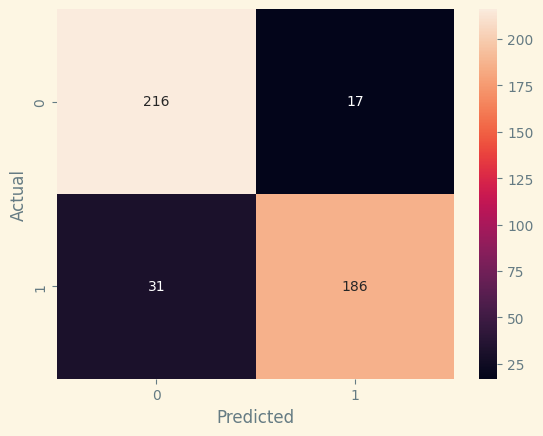

In [249]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(y_test, y_pred):
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
evaluate_model(y_test, y_pred)

## Using TF_IDF

In [250]:
# Shape of the TF-IDF matrix
print('TF-IDF matrix shape:', X_tfidf.shape)

# Feature names (words)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print('Number of features:', len(tfidf_feature_names))



TF-IDF matrix shape: (1499, 3472)
Number of features: 3472


In [251]:
# Convert sparse matrix to DataFrame for inspection (may be memory-intensive)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)
print(tfidf_df.head())


   abandant  ability  able  abroad  absolutely  absorbed  accent  accepting  \
0       0.0      0.0   0.0     0.0         0.0       0.0     0.0        0.0   
1       0.0      0.0   0.0     0.0         0.0       0.0     0.0        0.0   
2       0.0      0.0   0.0     0.0         0.0       0.0     0.0        0.0   
3       0.0      0.0   0.0     0.0         0.0       0.0     0.0        0.0   
4       0.0      0.0   0.0     0.0         0.0       0.0     0.0        0.0   

   accident  accurate  ...  youre  youth  youthful  youthmemories  youtube  \
0       0.0       0.0  ...    0.0    0.0       0.0            0.0      0.0   
1       0.0       0.0  ...    0.0    0.0       0.0            0.0      0.0   
2       0.0       0.0  ...    0.0    0.0       0.0            0.0      0.0   
3       0.0       0.0  ...    0.0    0.0       0.0            0.0      0.0   
4       0.0       0.0  ...    0.0    0.0       0.0            0.0      0.0   

    yr  yuo  yup  zealand  zulusbarbados  
0  0.0  0.0  

In [252]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # 'nostalgia' -> 1, 'not nostalgia' -> 0


In [253]:
from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [254]:
X_train_tfidf.shape, X_test_tfidf.shape, y_train_tfidf.shape, y_test_tfidf.shape

((1199, 3472), (300, 3472), (1199,), (300,))

In [255]:
from sklearn.naive_bayes import ComplementNB

# Instantiate the classifier
nb_classifier = ComplementNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train_tfidf)


ComplementNB()

Accuracy: 0.8366666666666667
Precision: 0.911504424778761
Recall: 0.7253521126760564
F1 Score: 0.807843137254902

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       158
           1       0.91      0.73      0.81       142

    accuracy                           0.84       300
   macro avg       0.85      0.83      0.83       300
weighted avg       0.85      0.84      0.83       300



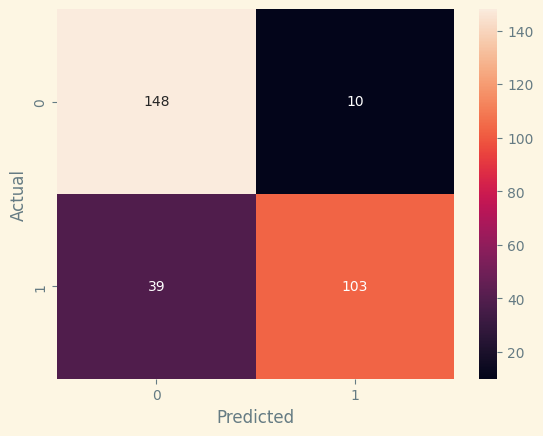

In [258]:
y_pred_tfidf = nb_classifier.predict(X_test_tfidf)
evaluate_model(y_test_tfidf,y_pred_tfidf )